# 1 - Capstone Two: Data Wrangling


## 1.1 - Content

Timeline and Summary


# 1.2 - Introduction


## 1.21 - Business Problem 

Henry Moldivksy is the owner of Invest With Henry, an option trading coaching company. He has tried multiple price points in his different programs throughout the last 3 years and adjusted his prices based on verbal / anecdotal feedback from his sales manager, his closers, and his leads. He wants more of a data-driven system on how to optimize the price so he can bring in maximum revenue every month and wants to know if he is charging enough.


# 1.3 - Imports

First step is importing all the library tools in order to complete your data science mission. Next is importing and saving the data to be processed and analyzed. In this case, it is sales data from the company, Invest With Henry LLC. 



In [208]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


# 1.4 - Objectives

Some fundamental questions we need to confirm about this data before we can move on.

* Do we have the desired data to fully explore and answer our business problem with the highest probability of being accurate and valid? 
* Do we have the right target values?
* Do we have other useful variables to answer other questions about the data? 
* Do we have any fundamental issues with the data? 



# 1.5 - Load the Invest w/ Henry Sales Data

In [206]:
sales_data = pd.read_csv(r'/Users/JusJosh/Desktop/Springboard/data_wrangling/Stripe Data Analysis.csv')


# 1.6 - Explore The Data  

### 1.6.1 Data Overview


In [210]:
sales_data.head()

,id,Seller Message,Created (UTC),Amount,Amount Refunded,Currency,Converted Amount,Converted Amount Refunded,Fee,Converted Currency,Status,Statement Descriptor,Customer ID,Captured
0,ch_3NaXUKDcoRe97Ant37uDG33h,Payment complete.,8/2/2023 5:20,10.0,0.0,usd,10.0,0.0,0.59,usd,Paid,INVESTWITHHENRY,cus_ONI45PLZuOITSp,True
1,ch_3NaW8ZDcoRe97Ant1NYxHKXq,Payment complete.,8/2/2023 3:54,10.0,0.0,usd,10.0,0.0,0.59,usd,Paid,INVESTWITHHENRY,cus_ONGfJkGgPwr5q1,True
2,ch_3NaVTGDcoRe97Ant1zypuc8O,Payment complete.,8/2/2023 3:11,30.0,0.0,usd,30.0,0.0,1.17,usd,Paid,INVESTWITHHENRY,cus_Np9KaHoUYvGWEu,True
3,ch_3NaUi9DcoRe97Ant0ZQsQ4Yq,The bank returned the decline code `insufficie...,8/2/2023 2:22,30.0,0.0,usd,30.0,0.0,0.00,usd,Failed,INVESTWITHHENRY,cus_Np8d9RrU2AA1tz,False
4,ch_3NaUhuDcoRe97Ant16qIFzbG,Payment complete.,8/2/2023 2:22,30.0,0.0,usd,30.0,0.0,1.62,usd,Paid,INVESTWITHHENRY,cus_O0NOBkkRsImtau,True


In [207]:
sales_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9945 entries, 0 to 9944
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         9830 non-null   object 
 1   Seller Message             9830 non-null   object 
 2   Created (UTC)              9945 non-null   object 
 3   Amount                     9945 non-null   float64
 4   Amount Refunded            9830 non-null   float64
 5   Currency                   9945 non-null   object 
 6   Converted Amount           9830 non-null   float64
 7   Converted Amount Refunded  9830 non-null   float64
 8   Fee                        9830 non-null   float64
 9   Converted Currency         9830 non-null   object 
 10  Status                     9945 non-null   object 
 11  Statement Descriptor       9807 non-null   object 
 12  Customer ID                9794 non-null   object 
 13  Captured                   9830 non-null   objec

In [65]:
# numeric data summary

sales_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Amount,9945.0,787.776873,1282.861570,1.0,97.00,300.00,1000.00,20000.0
Amount Refunded,9830.0,24.019197,231.005660,0.0,0.00,0.00,0.00,10000.0
Converted Amount,9830.0,776.811330,1270.618721,1.0,97.00,300.00,1000.00,20000.0
Converted Amount Refunded,9830.0,24.019197,231.005660,0.0,0.00,0.00,0.00,10000.0
Fee,9830.0,19.688760,34.028767,0.0,1.17,7.46,27.85,580.3


array([[<AxesSubplot:title={'center':'Created (UTC)'}>,
        <AxesSubplot:title={'center':'Amount'}>],
       [<AxesSubplot:title={'center':'Amount Refunded'}>,
        <AxesSubplot:title={'center':'Converted Amount'}>],
       [<AxesSubplot:title={'center':'Converted Amount Refunded'}>,
        <AxesSubplot:title={'center':'Fee'}>]], dtype=object)

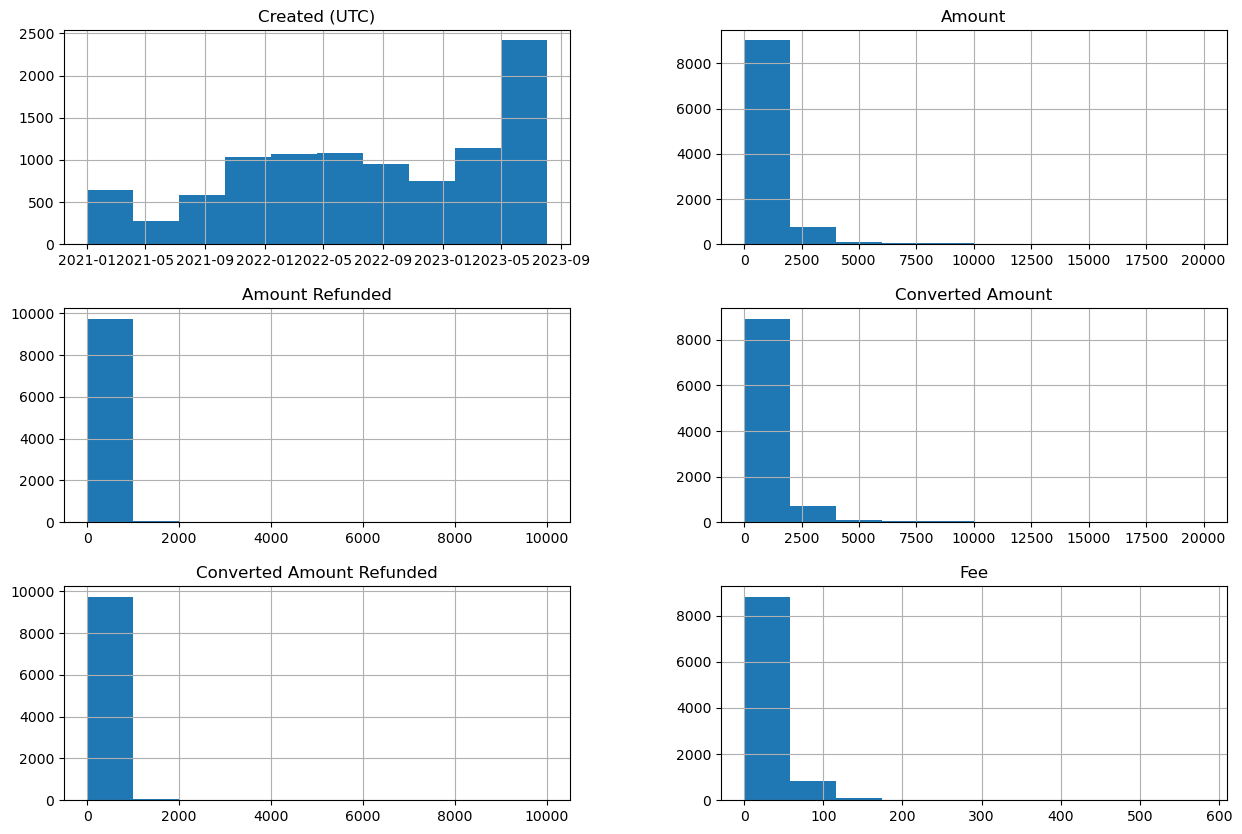

In [67]:
# distribution of values

sales_data.hist(figsize=(15,10))

#### 1.6.1.1 Data Accuracy

Find missing and inaccurate values


In [218]:
# find missing values

missing = pd.concat([sales_data.isnull().sum(), 100 * sales_data.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by=[], ascending = False)

,count,%
id,115,1.156360
Seller Message,115,1.156360
Created (UTC),0,0.000000
Amount,0,0.000000
Amount Refunded,115,1.156360
Currency,0,0.000000
Converted Amount,115,1.156360
Converted Amount Refunded,115,1.156360
Fee,115,1.156360
Converted Currency,115,1.156360


Overall, there is a 1.15 - 1.38% in the missing values column which is not bad. 

#### Would I need to clean this data more and drop some rows or modify some observations? 

### 1.6.2 - Sales observations




#### 1.6.2.1 - What is the total sales for it's lifetime business cycle?

In [212]:
total_sales = sales_data['Converted Amount'].sum()

print(total_sales)

7636055.37


The total amount of sales in Invest With Henry's entire business cycle according to their sales data is $7,636,055.37.

INTERESTING QUESTION, WHEN DID CUSTOMERS BUY THE MOST BY MONTH, DAY, AND TIME

##### 1.6.2.1.1 - What are monthly sales? 

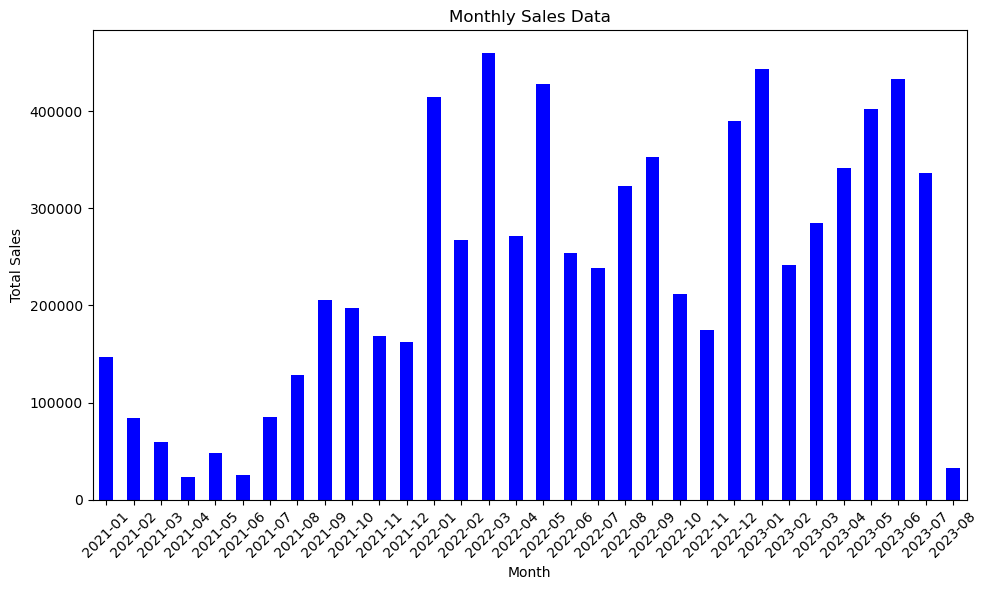

In [106]:
# Plot sales_monthly

# Set 'Created (UTC)' as the index
sales_monthly.set_index('Created (UTC)', inplace=True)

# Plotting
plt.figure(figsize=(10, 6))
sales_monthly['Converted Amount'].plot(kind='bar', color='blue')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Data')
plt.xticks(rotation=45)  

# Rotates x-axis labels for better readability
plt.tight_layout()
plt.show()


First year started lower in total sales compared to the last two years. This is expected since you're just starting out and working on improving your business process. Also in sales there is a some variability month to month throughout the year. 



##### 1.6.2.1.2 What months in each year did the most sales happen?

 

In [226]:
# First convert 'Date' column to datetime

sales_data['Created (UTC)'] = pd.to_datetime(sales_data['Created (UTC)'])

# Extract year and month into separate columns

sales_data['Year'] = sales_data['Created (UTC)'].dt.year
sales_data['Month'] = sales_data['Created (UTC)'].dt.month

# Group by year and month, calculate total sales, and find the month with the most sales

result = sales_data.groupby(['Year', 'Month'])['Converted Amount'].sum().reset_index()
max_sales_per_year = result.groupby('Year')['Converted Amount'].idxmax()
months_with_most_sales = result.loc[max_sales_per_year]

print(months_with_most_sales)

## but what do they mean by most sales here? 

    Year  Month  Converted Amount
8   2021      9         205815.43
14  2022      3         460234.33
24  2023      1         443496.00


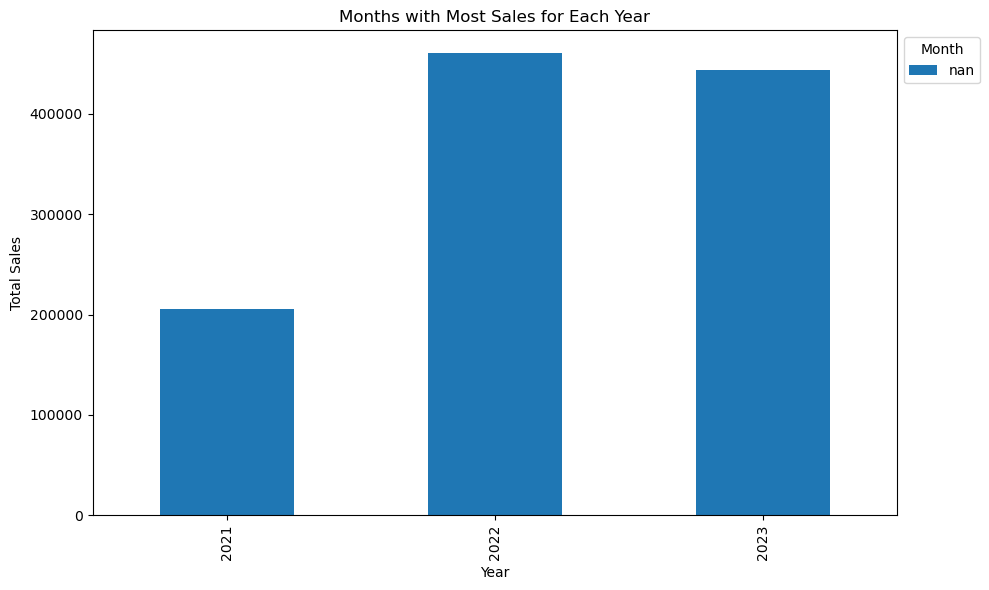

In [100]:
# MAKE PLOT FOR THIS, BAR OR HISTOGRAM

# Pivot the data for easier plotting
most_sales_pivot_table = months_with_most_sales.pivot(index='Year', columns='Month', values='Converted Amount')

# Plotting
ax = most_sales_pivot_table.plot(kind='bar', figsize=(10, 6))
ax.set_xlabel('Year')
ax.set_ylabel('Total Sales')
ax.set_title('Months with Most Sales for Each Year')
plt.legend(title='Month', bbox_to_anchor=(1, 1))  # Legend outside the plot
plt.tight_layout()
plt.show()



In [70]:
# calculating sales data by month 

 
# convert date column to datetime
sales_data['Created (UTC)'] = pd.to_datetime(sales_data['Created (UTC)'])

# group data by month + calculate sales
sales_monthly = sales_data.groupby(sales_data['Created (UTC)'].dt.to_period('M'))['Converted Amount'].sum()

# reset index for cleaner data frame
sales_monthly = sales_monthly.reset_index()

# display the result 
print(sales_monthly)

# problem is 'Converted Amount' is not accurate to actual profits, 'Converted Amount Refunded' and 'Fee' needs to be subtracted


   Created (UTC)  Converted Amount
0        2021-01         147366.70
1        2021-02          83955.60
2        2021-03          59271.57
3        2021-04          23280.50
4        2021-05          48209.27
5        2021-06          25761.27
6        2021-07          84780.80
7        2021-08         128739.79
8        2021-09         205815.43
9        2021-10         197367.23
10       2021-11         168163.18
11       2021-12         162833.09
12       2022-01         414177.32
13       2022-02         267634.04
14       2022-03         460234.33
15       2022-04         271365.00
16       2022-05         428195.68
17       2022-06         253743.35
18       2022-07         238128.34
19       2022-08         322805.00
20       2022-09         352785.00
21       2022-10         211575.00
22       2022-11         174823.00
23       2022-12         389990.00
24       2023-01         443496.00
25       2023-02         241785.00
26       2023-03         284573.00
27       2023-04    

#### 1.6.2.2 - How many unique customers have bought from Invest With Henry? 

In [86]:
sales_data['Customer ID'].nunique()


5597

The total number of customer's with unique Customer ID's is 5,597. 


#### 1.6.2.3 - What are the total unique transactions and totals sales for each of the sales offers or "Statement Descriptors"? 

In [234]:
# Group by 'Statement Descriptor' and calculate unique price points and total sales
grouped_data = sales_data.groupby('Statement Descriptor').agg({
    'Converted Amount': ['nunique', 'sum']
})

# Rename the columns for clarity
grouped_data.columns = ['Total Unique Price Points', 'Total Sales']

# Reset the index to turn the group labels into columns
grouped_data.reset_index(inplace=True)

# Sort the data by total sales in descending order
sorted_grouped_data = grouped_data.sort_values(by='Total Sales', ascending=False)


# Print the sorted results
print("Sales Offers Statistics (Sorted by Total Sales)")
print("-" * 45)
for index, row in sorted_grouped_data.iterrows():
    statement_descriptor = row['Statement Descriptor']
    unique_price_points = row['Total Unique Price Points']
    total_sales = row['Total Sales']
    print(f"Sales Offer: {statement_descriptor}")
    print(f"Total Unique Price Points: {unique_price_points}")
    print(f"Total Sales: {total_sales}")
    print("-" * 45)


Sales Offers Statistics (Sorted by Total Sales)
---------------------------------------------
Sales Offer: INVESTWITHHENRY
Total Unique Price Points: 166
Total Sales: 4454562.7
---------------------------------------------
Sales Offer: UnlimitedOptionsTrader
Total Unique Price Points: 1
Total Sales: 517556.0
---------------------------------------------
Sales Offer: IWH OICA - EmeraldTM
Total Unique Price Points: 3
Total Sales: 481176.0
---------------------------------------------
Sales Offer: OIB - Henry
Total Unique Price Points: 5
Total Sales: 375500.0
---------------------------------------------
Sales Offer: IWH OICA - RubyTM
Total Unique Price Points: 3
Total Sales: 328597.0
---------------------------------------------
Sales Offer: IWH OICA - BronzeTM
Total Unique Price Points: 1
Total Sales: 156000.0
---------------------------------------------
Sales Offer: Unltd Option Trader
Total Unique Price Points: 3
Total Sales: 147600.0
---------------------------------------------
Sal

In [227]:
unique_transactions = sales_data['Statement Descriptor'].value_counts()
print(unique_transactions)
print(unique_transactions.info())

INVESTWITHHENRY           7584
SOBP (InvestwithHenry)     582
IWH OICA - EmeraldTM       193
UnlimitedOptionsTrader     148
PSM-GA                     142
IWH OICA - BronzeTM        130
HIC                        117
Save your Seat!            102
HIC-Quarterly               94
IWH OICA - RubyTM           87
IWH OICA - SapphireTM       81
SAOM-GA                     58
IWH OICA - SilverTM         58
OIB - Henry                 48
IWH Lifetime Renewal        44
investwithhenry             40
IWH-OICA-EMD25-FP           35
OICA ANNUAL                 28
CCM-GA                      26
IWH OICA - GoldTM           25
IWH OICA - DiamondTM        24
ELITEINVESTOR               22
LifetimeDiscordUpgrade      20
IWH OICA - IronTM           20
Unltd Option Trader         19
Coaching Profits Acade      11
IWH-OICA-EMD25-NRD-FP        8
Expert Investor              8
InvestWHenry                 7
IWH-OICA-RUB25-FP            6
PSM-VIP                      5
IWH-OICA-SAP25-FP            5
Legendar

##### Visualizations of different sales offers or "Statement Descriptors"

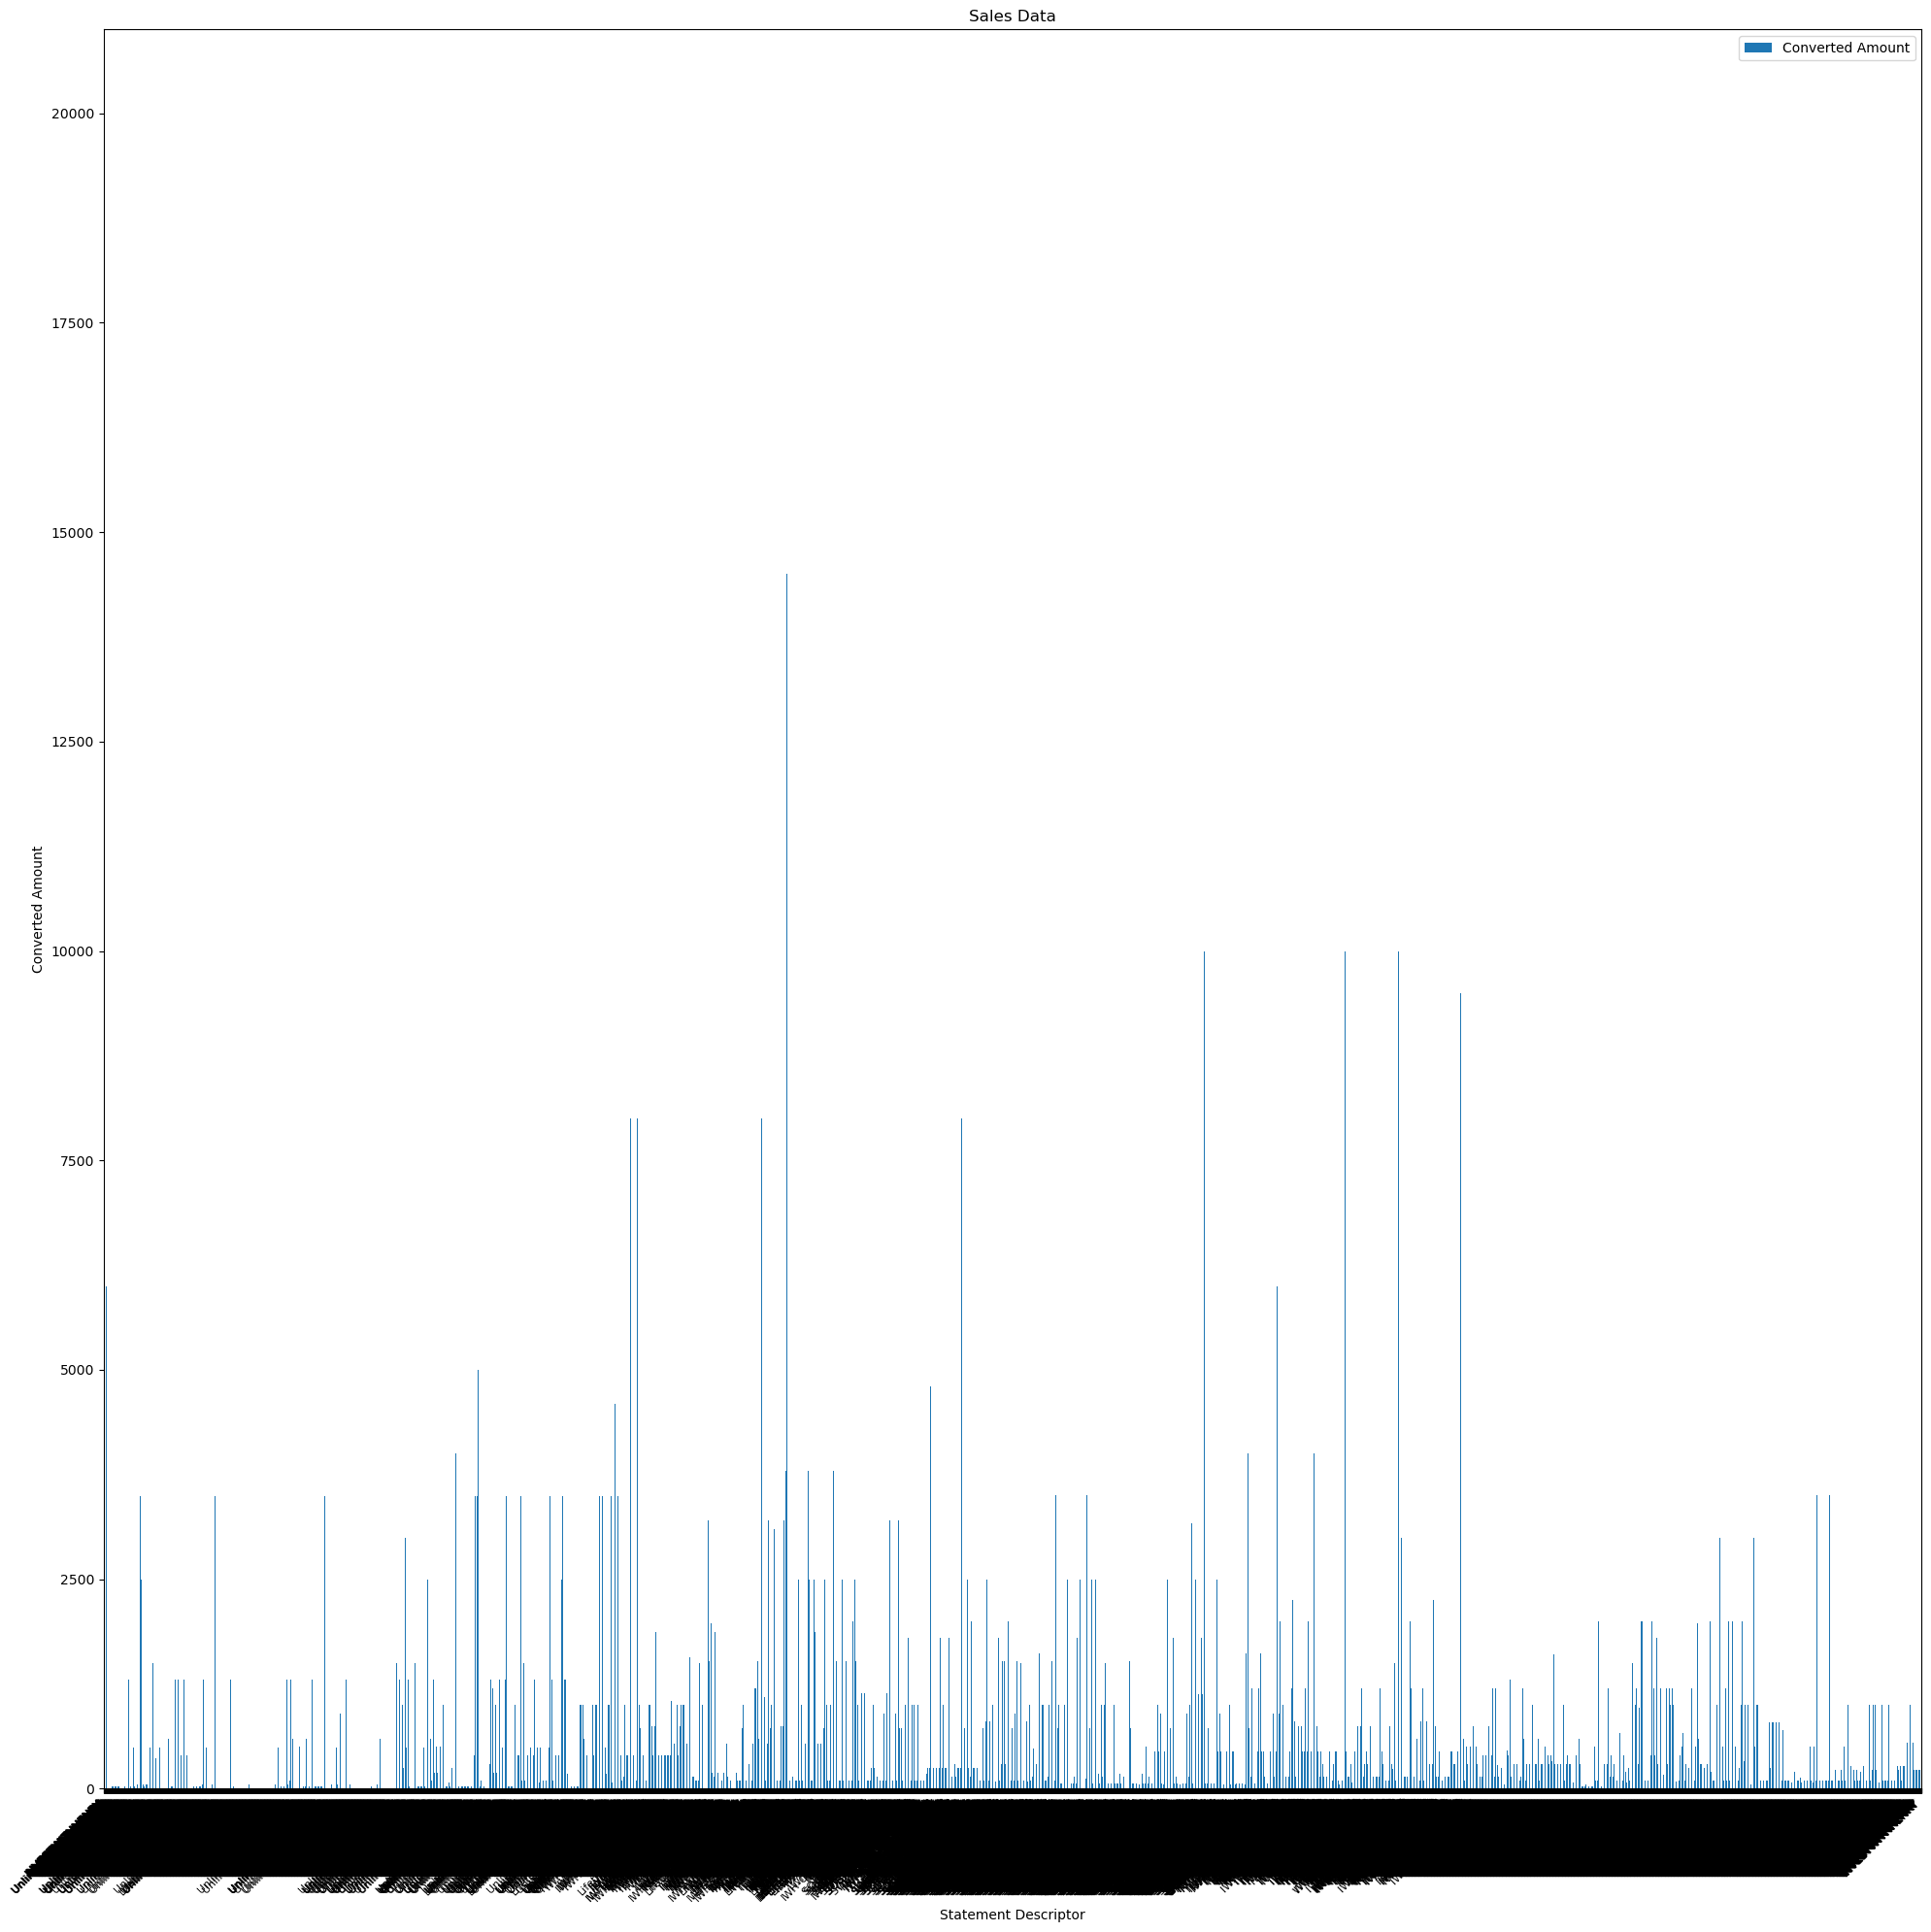

In [217]:
# Calculate how much each program sold, Statement Descriptor + Converted Amount
# Create a bar chart

ax = sales_data.plot.bar(x='Statement Descriptor', y='Converted Amount', figsize=(20, 20))
ax.set_xlabel('Statement Descriptor')
ax.set_ylabel('Converted Amount')
ax.set_title('Sales Data')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize= 8, ha='right')  # Rotate labels by 45 degrees

plt.tight_layout()
plt.show()

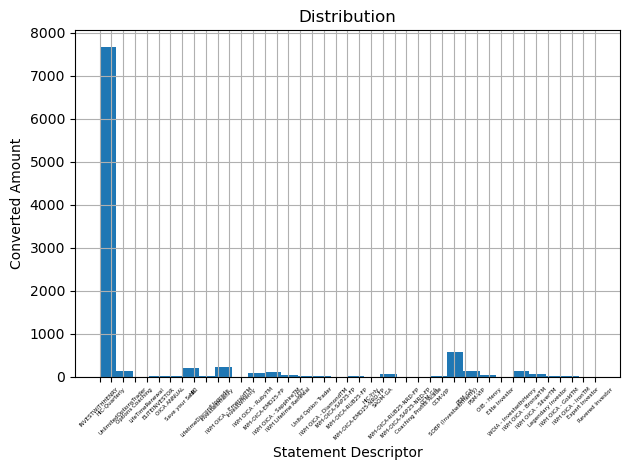

In [122]:
sales_data['Statement Descriptor'].hist(bins=30)
plt.xlabel('Statement Descriptor')
plt.ylabel('Converted Amount')
plt.title('Distribution')
plt.xticks(rotation=45, fontsize=4)  # Adjust x-axis tick label size and rotation
plt.tight_layout()
plt.show()



So there are 43 unique "Statement Descriptors" or offers IVH sold at various times. Each offer has multiple price points. 

We could find out which offers sold more than $50,000 dollars to filter out any one offs or offers that were not really significant to the sales cycles.  

Also, if we were to use the 80/20 principle and find the offer with the most total sales, we could make the guess that the "INVESTWITHENRY" transactions have the most at 7,584 programs sold compared to the rest. 

We will consider programs with less than 100 programs sold as irrelevant.  

In [137]:
###  FIND THE MOST SOLD PRODUCT

most_sold_product = sales_data['Statement Descriptor'].value_counts().idxmax()
print(most_sold_product)

INVESTWITHHENRY


In [142]:
# Filter the data for the most sold product

most_sold_product_data = sales_data[sales_data['Statement Descriptor'] == most_sold_product]

# Find the price of the most sold product (assuming 'price' is a column in your data)

most_sold_product_price = most_sold_product_data['Converted Amount'].iloc[0]

# Print the results

print(f"The most sold product is '{most_sold_product}' with a total quantity of {most_sold_product_data.shape[0]} units.")
print(f"The price of the most sold product is {most_sold_product_price}.")



The most sold product is 'INVESTWITHHENRY' with a total quantity of 7584 units.
The price of the most sold product is 10.0.


##### Add "Quantity Sold", then filter sales with greater than 100 sales

Calcuate total revenue for programs over 100 sales




#### 1.6.2.4 - How many unique price points for each unique transactions?

In [125]:
sales_data.head()

,id,Seller Message,Created (UTC),Amount,Amount Refunded,Currency,Converted Amount,Converted Amount Refunded,Fee,Converted Currency,Status,Statement Descriptor,Customer ID,Captured,Year,Month
0,ch_3NaXUKDcoRe97Ant37uDG33h,Payment complete.,2023-08-02 05:20:00,10.0,0.0,usd,10.0,0.0,0.59,usd,Paid,INVESTWITHHENRY,cus_ONI45PLZuOITSp,True,2023,8
1,ch_3NaW8ZDcoRe97Ant1NYxHKXq,Payment complete.,2023-08-02 03:54:00,10.0,0.0,usd,10.0,0.0,0.59,usd,Paid,INVESTWITHHENRY,cus_ONGfJkGgPwr5q1,True,2023,8
2,ch_3NaVTGDcoRe97Ant1zypuc8O,Payment complete.,2023-08-02 03:11:00,30.0,0.0,usd,30.0,0.0,1.17,usd,Paid,INVESTWITHHENRY,cus_Np9KaHoUYvGWEu,True,2023,8
3,ch_3NaUi9DcoRe97Ant0ZQsQ4Yq,The bank returned the decline code `insufficie...,2023-08-02 02:22:00,30.0,0.0,usd,30.0,0.0,0.00,usd,Failed,INVESTWITHHENRY,cus_Np8d9RrU2AA1tz,False,2023,8
4,ch_3NaUhuDcoRe97Ant16qIFzbG,Payment complete.,2023-08-02 02:22:00,30.0,0.0,usd,30.0,0.0,1.62,usd,Paid,INVESTWITHHENRY,cus_O0NOBkkRsImtau,True,2023,8


In [128]:
unique_prices_per_program = sales_data.groupby('Statement Descriptor')['Converted Amount'].unique()
print(unique_prices_per_program)

Statement Descriptor
CCM-GA                                                              [247.0]
CCM-VIP                                                             [997.0]
Coaching Profits Acade                                             [3500.0]
ELITEINVESTOR                                                      [1500.0]
Elite Investor                                                     [3060.0]
Expert Investor                                                     [800.0]
HIC                                                          [497.0, 397.0]
HIC-Quarterly                                                       [189.0]
HIC-Yrly                                                            [597.0]
INVESTWITHHENRY           [10.0, 30.0, 1300.0, 397.0, 600.0, 6000.0, 50....
IWH Lifetime Renewal                                               [1500.0]
IWH OICA - BronzeTM                                                [1200.0]
IWH OICA - DiamondTM                                  [7000.0, 6000

#### 1.6.2.5 What product and price point sold the most?


In [138]:
### AGGRREGATE THE DATA

product_sales = sales_data.groupby('Statement Descriptor').agg({'Statement Descriptor': 'sum', 'Converted Amount': 'sum'})
print(product_sales)

                                                     Statement Descriptor  \
Statement Descriptor                                                        
CCM-GA                  CCM-GACCM-GACCM-GACCM-GACCM-GACCM-GACCM-GACCM-...   
CCM-VIP                                                    CCM-VIPCCM-VIP   
Coaching Profits Acade  Coaching Profits AcadeCoaching Profits AcadeCo...   
ELITEINVESTOR           ELITEINVESTORELITEINVESTORELITEINVESTORELITEIN...   
Elite Investor                 Elite InvestorElite InvestorElite Investor   
Expert Investor         Expert InvestorExpert InvestorExpert InvestorE...   
HIC                     HICHICHICHICHICHICHICHICHICHICHICHICHICHICHICH...   
HIC-Quarterly           HIC-QuarterlyHIC-QuarterlyHIC-QuarterlyHIC-Qua...   
HIC-Yrly                                         HIC-YrlyHIC-YrlyHIC-Yrly   
INVESTWITHHENRY         INVESTWITHHENRYINVESTWITHHENRYINVESTWITHHENRYI...   
IWH Lifetime Renewal    IWH Lifetime RenewalIWH Lifetime RenewalIWH Li...   

#### 1.6.2.6 - Refunds 

What is the percentage of refunds and which price points refunded the most? 

In [178]:
sales_data.head()

,id,Seller Message,Created (UTC),Amount,Amount Refunded,Currency,Converted Amount,Converted Amount Refunded,Fee,Converted Currency,Status,Statement Descriptor,Customer ID,Captured,Year,Month
0,ch_3NaXUKDcoRe97Ant37uDG33h,Payment complete.,2023-08-02 05:20:00,10.0,0.0,usd,10.0,0.0,0.59,usd,Paid,INVESTWITHHENRY,cus_ONI45PLZuOITSp,True,2023,8
1,ch_3NaW8ZDcoRe97Ant1NYxHKXq,Payment complete.,2023-08-02 03:54:00,10.0,0.0,usd,10.0,0.0,0.59,usd,Paid,INVESTWITHHENRY,cus_ONGfJkGgPwr5q1,True,2023,8
2,ch_3NaVTGDcoRe97Ant1zypuc8O,Payment complete.,2023-08-02 03:11:00,30.0,0.0,usd,30.0,0.0,1.17,usd,Paid,INVESTWITHHENRY,cus_Np9KaHoUYvGWEu,True,2023,8
3,ch_3NaUi9DcoRe97Ant0ZQsQ4Yq,The bank returned the decline code `insufficie...,2023-08-02 02:22:00,30.0,0.0,usd,30.0,0.0,0.00,usd,Failed,INVESTWITHHENRY,cus_Np8d9RrU2AA1tz,False,2023,8
4,ch_3NaUhuDcoRe97Ant16qIFzbG,Payment complete.,2023-08-02 02:22:00,30.0,0.0,usd,30.0,0.0,1.62,usd,Paid,INVESTWITHHENRY,cus_O0NOBkkRsImtau,True,2023,8


In [181]:
#calculate total amount refunded

total_amount_refunded = sales_data['Amount Refunded'].sum()
print(f"Total Refunded Amount: {total_amount_refunded}")

Total Refunded Amount: 236108.70999999996


In [182]:
#count number of refunds

num_refunds = sales_data[sales_data['Amount Refunded'] != 0]['Amount Refunded'].count()
print(f"Number of Refunds: {num_refunds}")

Number of Refunds: 329


In [183]:
#identify maximum refund

max_refund = sales_data['Amount Refunded'].max()
print(f"Highest Refund Amount: {max_refund}")

Highest Refund Amount: 10000.0


In [184]:
#calculate average refund

average_refund = sales_data['Amount Refunded'].mean()
print(f"Average Refunded Amount: {average_refund}")

Average Refunded Amount: 24.0191973550356


#### 1.6.2.7 - Currency


In [75]:
# where are customers buying from or what currency are they using
# explore currency column and find unique values

sales_data['Currency'].unique()

array(['usd', 'cad'], dtype=object)

Seems like the two main currencies are United States Dollar and the Canadian Dollar. Let's see if there are any missing values in currency. 




In [78]:
sales_data['Currency'].isna().sum()

0

### 1.6.3 - Target Observation: "INVESTWITHHENRY" Transactions

* What are the different price points in "INVESTIWTHHENRY"? 

* What is the quantity sold of each price point? 

* And what is the total revenue of each price point? 

In [151]:
# Filter data for 'INVESTWITHHENRY'

ivh_data = sales_data[sales_data['Statement Descriptor'] == 'INVESTWITHHENRY']

# Group and filter data by price or 'Converted Amount' and aggregate the total quantity sold and revenue for each price

price_points = ivh_data.groupby('Converted Amount').agg({'Statement Descriptor': 'count', 'Converted Amount': 'sum'})

# Print the results 

print("Price Point  |  Quantity Sold  |  Total Revenue")
print("-" * 45)
for price, row in price_points.iterrows():
    quantity_sold = row['Statement Descriptor']
    total_revenue = row['Converted Amount']
    print(f"${price:<10} | {quantity_sold:<14} | {total_revenue:<14}")

Price Point  |  Quantity Sold  |  Total Revenue
---------------------------------------------
$1.0        | 79.0           | 79.0          
$9.0        | 2.0            | 18.0          
$9.97       | 2.0            | 19.94         
$10.0       | 852.0          | 8520.0        
$11.05      | 1.0            | 11.05         
$20.0       | 1.0            | 20.0          
$27.0       | 44.0           | 1188.0        
$29.95      | 2.0            | 59.9          
$30.0       | 465.0          | 13950.0       
$35.0       | 1.0            | 35.0          
$40.0       | 1.0            | 40.0          
$49.0       | 2.0            | 98.0          
$50.0       | 199.0          | 9950.0        
$54.54      | 10.0           | 545.4         
$58.0       | 7.0            | 406.0         
$69.0       | 47.0           | 3243.0        
$69.3       | 17.0           | 1178.1        
$79.04      | 1.0            | 79.04         
$79.2       | 3.0            | 237.60000000000002
$80.71      | 1.0           

#### "INVESTWITHHENRY" notes

EBOOK = $10
HIC SUB = $30 

Henry Jacob, [Aug 8, 2023 at 16:29:27]:
Save your seat is a $247 webinar I believe!

OIB is $10,000 bootcamp

invest with henry idk

ccm idk

elite investor is $99

Coaching prodits is $3,500

expert is $99

SOBP is a beginner course

If you don't know it's OICA

#### 1.6.3.1 - What are the top 5-10 price points that have the most revenue in "INVESTWITHHENRY"?


In [198]:
# Group by price and calculate the total revenue for each price point
price_revenue = ivh_data.groupby('Converted Amount')['Converted Amount'].sum()

# Reset the index of the Series and rename columns
price_revenue = price_revenue.reset_index(name='Total Revenue')

# Sort the price_revenue DataFrame by revenue in descending order
sorted_price_revenue = price_revenue.sort_values(by='Total Revenue', ascending=False)

# Print the top 5-10 price points
print("Top Price Points by Total Revenue")
print("-" * 45)
for index, row in sorted_price_revenue.head(10).iterrows():
    revenue = row['Total Revenue']
    price = row['Converted Amount']
    print(f"Price: ${price:<10} | Total Revenue: ${revenue:<10}")


Top Price Points by Total Revenue
---------------------------------------------
Price: $1000.0     | Total Revenue: $445000.0  
Price: $1300.0     | Total Revenue: $353600.0  
Price: $2000.0     | Total Revenue: $274000.0  
Price: $3200.0     | Total Revenue: $249600.0  
Price: $1200.0     | Total Revenue: $207600.0  
Price: $1520.0     | Total Revenue: $156560.0  
Price: $450.0      | Total Revenue: $130050.0  
Price: $720.0      | Total Revenue: $112320.0  
Price: $997.0      | Total Revenue: $109670.0  
Price: $300.0      | Total Revenue: $103800.0  


#### 1.6.3.2 - What is the total revenue of the top 10 price points in "INVESTWITHHENRY"?


In [219]:
top_ten_price_points = sorted_price_revenue.head(10)

total_revenue_top_ten = top_ten_price_points.sum()

print(f"Total Revenue of Top Ten Price Points: {total_revenue_top_ten}")

Total Revenue of Top Ten Price Points: Converted Amount      12687.0
Total Revenue       2142200.0
dtype: float64


#### 1.6.3.3 - How long did the top ten price points sell for in 'INVESTWITHHENRY'? 

In [201]:
# Initialize an empty dictionary to store time durations

price_durations = {}


# Iterate through top ten price points and calculate their durations

for price in top_ten_price_points['Converted Amount']:
    price_data = ivh_data[ivh_data['Converted Amount'] == price]
    min_time = price_data['Created (UTC)'].min()
    max_time = price_data['Created (UTC)'].max()
    duration = max_time - min_time
    price_durations[price] = duration
    
# Print the time durations for each price point

print("Price Point  |  Time Duration")
print("-" * 30)
for price, duration in price_durations.items():
    print(f"${price:<10} | {duration}")

Price Point  |  Time Duration
------------------------------
$1000.0     | 937 days 02:10:00
$1300.0     | 697 days 04:28:00
$2000.0     | 868 days 07:11:00
$3200.0     | 294 days 01:43:00
$1200.0     | 656 days 17:09:00
$1520.0     | 375 days 08:21:00
$450.0      | 656 days 18:41:00
$720.0      | 382 days 23:07:00
$997.0      | 882 days 23:33:00
$300.0      | 887 days 01:48:00


#### 1.6.3.4 - How long did each price point sell for in "INVESTWITHHENRY"? 


In [155]:
# Group by price and calculate the time duration for each price point 

price_points_time = ivh_data.groupby('Converted Amount').agg({'Statement Descriptor': 'count', 'Created (UTC)': ['min', 'max']})

# Calculate the time duration for each price point

price_points_time['Time Duration'] = price_points_time[('Created (UTC)', 'max')] - price_points_time[('Created (UTC)', 'min')]

# Print the results

print("Price Point  |  Quantity Sold  |  Time Duration")
print("-" * 45)
for price, row in price_points_time.iterrows():
    quantity_sold = row[('Statement Descriptor', 'count')]
    time_duration = row['Time Duration']
    print(f"${price:<10} | {quantity_sold:<14} | {time_duration}")

Price Point  |  Quantity Sold  |  Time Duration
---------------------------------------------
$1.0        | 79             |    699 days 06:32:00
Name: 1.0, dtype: timedelta64[ns]
$9.0        | 2              |    47 days 21:05:00
Name: 9.0, dtype: timedelta64[ns]
$9.97       | 2              |    13 days 18:16:00
Name: 9.97, dtype: timedelta64[ns]
$10.0       | 852            |    48 days 17:19:00
Name: 10.0, dtype: timedelta64[ns]
$11.05      | 1              |    0 days
Name: 11.05, dtype: timedelta64[ns]
$20.0       | 1              |    0 days
Name: 20.0, dtype: timedelta64[ns]
$27.0       | 44             |    12 days 22:06:00
Name: 27.0, dtype: timedelta64[ns]
$29.95      | 2              |    0 days 01:06:00
Name: 29.95, dtype: timedelta64[ns]
$30.0       | 465            |    109 days 10:52:00
Name: 30.0, dtype: timedelta64[ns]
$35.0       | 1              |    0 days
Name: 35.0, dtype: timedelta64[ns]
$40.0       | 1              |    0 days
Name: 40.0, dtype: timedelta64[ns]

# 1.7 - Program Price Optimization

Which sales offer helped the most with product sales? 

